# Recursive Text Editing: Result

In [3]:
#!/usr/bin/env python
# -*- coding:utf-8 -*-

__author__ = 'Shining'
__email__ = 'mrshininnnnn@gmail.com'

In [4]:
# dependency
# public
import os
%matplotlib inline
# private
from utils import *

## Increasing Sequence Length Analysis

In [5]:
# parameters
method = 'recursion' # end2end, recursion, tagging
data_src = 'nss' # aoi, nss
data_mode = 'online' # online, offline
# bi_gru_rnn_att, bi_lstm_rnn_att
model_name = 'bi_lstm_rnn_att'
num_size = 100
min_seq_len = 5
max_seq_len = 30
data_size = 10000
val_or_test = 'test' # val, test

In [6]:
# define path
LOG_PATH = os.path.join(
    'log', 
    data_src, 
    data_mode, 
    model_name, 
    method, 
    'num_size_{}'.format(num_size), 
    'seq_len_{}', 
    'data_size_{}'.format(data_size), 
    '{}.txt'.format(val_or_test))

In [7]:
# read data
raw_data_dict = {}
for i in range(min_seq_len, max_seq_len+1, 5):
    file_name = os.path.join(LOG_PATH.format(i))
    print(file_name)
    raw_data_dict[file_name] = load_txt(file_name)

log/nss/online/bi_lstm_rnn_att/recursion/num_size_100/seq_len_5/data_size_10000/test.txt


FileNotFoundError: [Errno 2] No such file or directory: 'log/nss/online/bi_lstm_rnn_att/recursion/num_size_100/seq_len_5/data_size_10000/test.txt'

In [8]:
# keys = ['epoch', 'step', 'loss', 'acc', 'token_acc', 'seq_acc']
data_dict = {k: parse_log(v) for k, v in raw_data_dict.items()}

In [7]:
# 'Epoch', 'Step', 'Loss', 'Equation Accuracy', 'Token Accuracy', 'Sequence Accuracy'
criteria = 'Sequence Accuracy'
criteria_dict = {}
for i in range(min_seq_len, max_seq_len+1, 5):
    label = 'seq_len_{}'.format(i)
    key = LOG_PATH.format(i)
    criteria_list = [data[criteria] for data in data_dict[key]]
    criteria_dict[label] = criteria_list

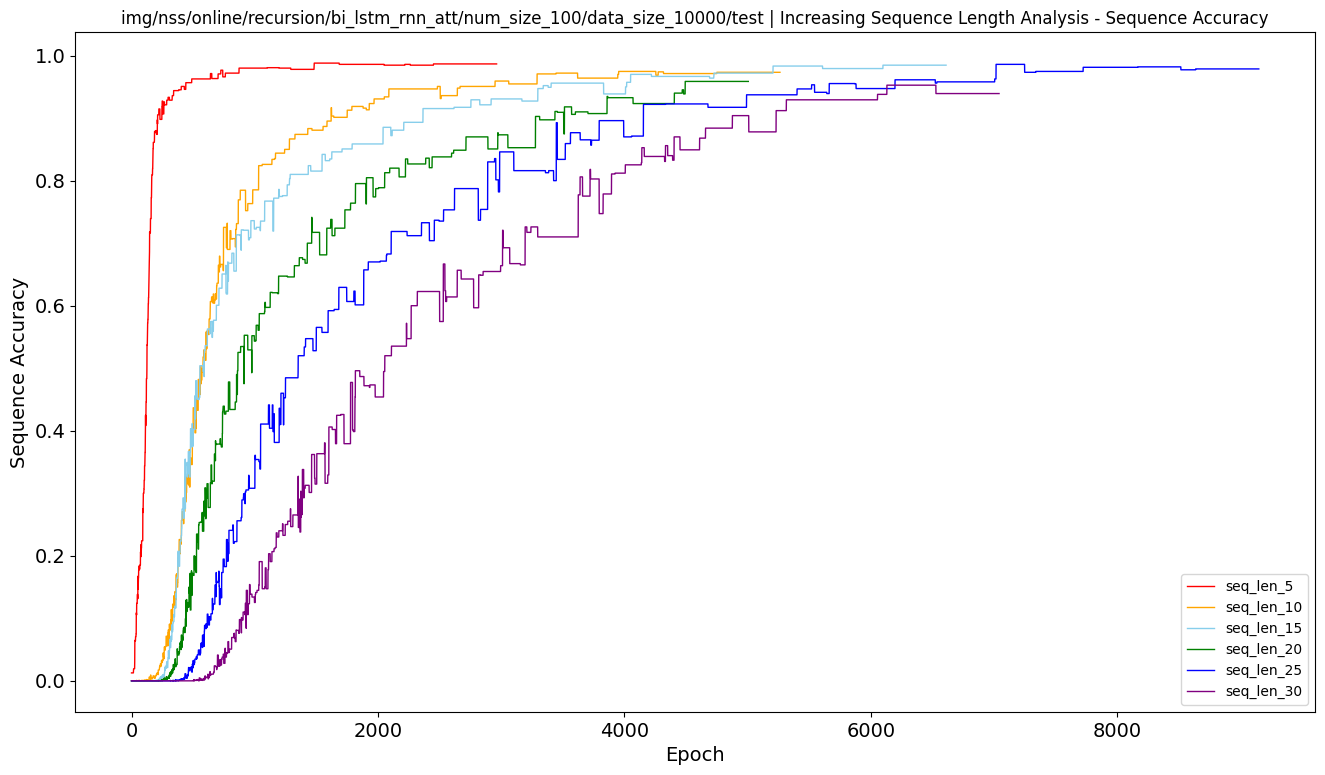

In [8]:
colors = ['red', 'orange', 'skyblue', 'green', 'blue', 'purple']
save_path = os.path.join(
    'img', 
    data_src, 
    data_mode, 
    method, 
    model_name, 
    'num_size_{}'.format(num_size), 
    'data_size_{}'.format(data_size), 
    val_or_test)

if not os.path.exists(save_path): os.makedirs(save_path)

title = 'Increasing Sequence Length Analysis - {}'.format(criteria)

show_plot(
    data_dict=criteria_dict, 
    colors=colors, 
    title=title, 
    xlabel='Epoch', 
    ylabel=criteria, 
    save_path=save_path)

## Increasing Data Size Analysis

In [159]:
# parameters
method = 'rec' # e2e, tag, rec
data_src = 'aor' # aes, aor, aec
data_mode = 'online' # online, offline
# bi_lstm_rnn_att
model_name = 'bi_lstm_rnn_att'
num_size = 10
seq_len = 5
min_data_size = 10000
max_data_size = 30000
val_or_test = 'test' # val, test

In [160]:
# define path
LOG_PATH = os.path.join(
    'log', 
    data_src, 
    data_mode, 
    model_name, 
    method,
    'num_size_{}'.format(num_size), 
    'seq_len_{}'.format(seq_len), 
    'data_size_{}', 
    '{}.txt'.format(val_or_test))

In [161]:
# read data
raw_data_dict = {}
for i in range(min_data_size, max_data_size+1, 10000):
    file_name = LOG_PATH.format(i)
    print(file_name)
    raw_data_dict[file_name] = load_txt(file_name)

log/aor/online/bi_lstm_rnn_att/rec/num_size_10/seq_len_5/data_size_10000/test.txt
log/aor/online/bi_lstm_rnn_att/rec/num_size_10/seq_len_5/data_size_20000/test.txt
log/aor/online/bi_lstm_rnn_att/rec/num_size_10/seq_len_5/data_size_30000/test.txt


In [162]:
# extract info from log
data_dict = {k: parse_log(v) for k, v in raw_data_dict.items()}

In [163]:
# 'Epoch', 'Step', 'Loss', 'Equation Accuracy', 'Token Accuracy', 'Sequence Accuracy'
criteria = 'Equation Accuracy'
criteria_dict = {}
for i in range(min_data_size, max_data_size+1, 10000):
    label = 'data_size_{}'.format(i)
    key = LOG_PATH.format(i)
    criteria_list = [data[criteria] for data in data_dict[key]]
    criteria_dict[label] = criteria_list

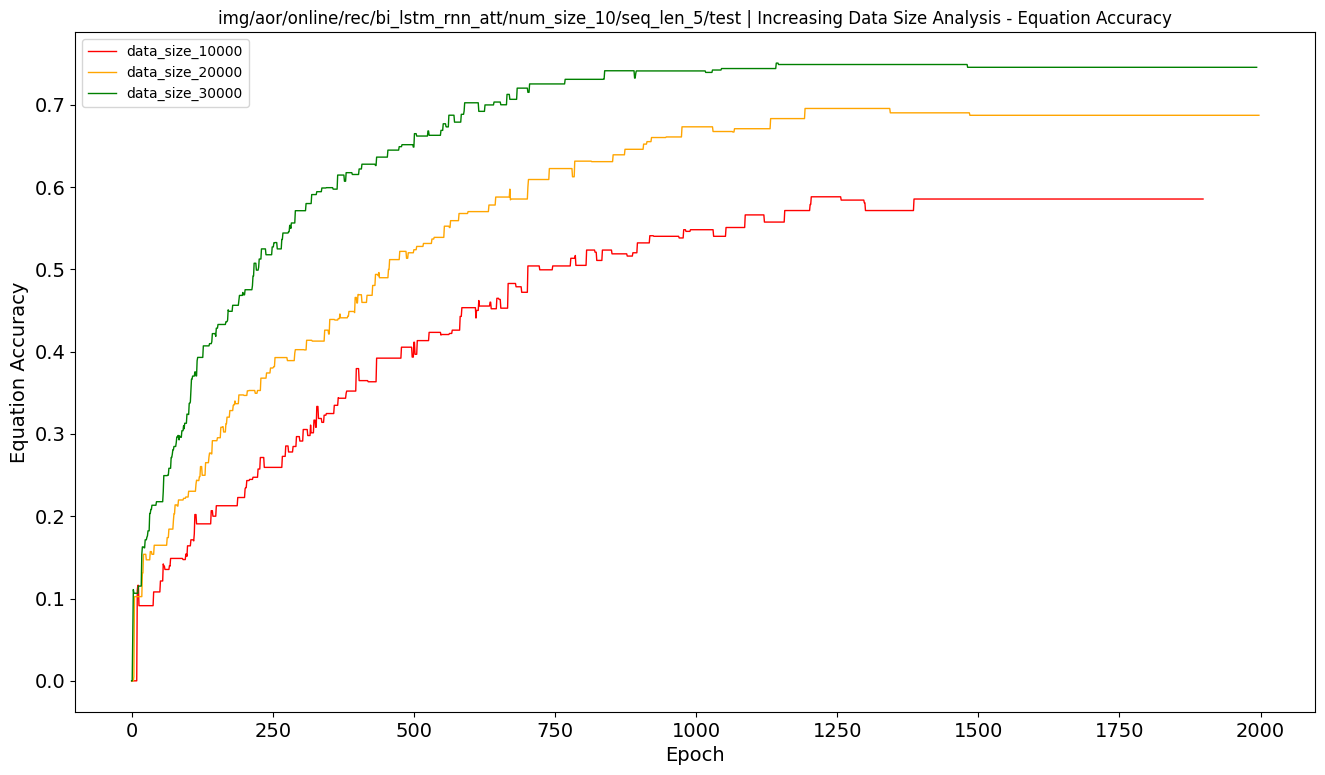

In [164]:
colors = ['red', 'orange', 'green', 'skyblue', 'blue', 'magenta', 'purple']
save_path = os.path.join(
    'img', 
    data_src, 
    data_mode, 
    method, 
    model_name, 
    'num_size_{}'.format(num_size), 
    'seq_len_{}'.format(seq_len), 
    val_or_test)

if not os.path.exists(save_path): os.makedirs(save_path)

title = 'Increasing Data Size Analysis - {}'.format(criteria)

show_plot(
    data_dict=criteria_dict, 
    colors=colors, 
    title=title, 
    xlabel='Epoch', 
    ylabel=criteria, 
    save_path=save_path)

## Methods Comparison

In [464]:
# parameters
candidates = [
#     ['offline', 'e2e'], 
    ['online', 'e2e'], 
#     ['offline', 'tag'], 
    ['online', 'tag'], 
#     ['offline', 'rec'], 
    ['online', 'rec']
]
data_src = 'aec' # aes, aor, aec
model_name = 'bi_lstm_rnn_att' # transformer, bi_lstm_rnn_att
num_size = 10
seq_len = 5
data_size = 10000
val_or_test = 'test' # val, test

In [465]:
# define path for end2end
LOG_PATH = os.path.join(
    'log', 
    data_src, 
    '{}', # data mode 
    model_name, # model name
    '{}', # method
    'num_size_{}'.format(num_size), 
    'seq_len_{}'.format(seq_len), 
    'data_size_{}'.format(data_size), 
    '{}.txt'.format(val_or_test))

In [466]:
# read data
raw_data_dict = {}
for c in candidates:
    file_path = LOG_PATH.format(c[0], c[1])
    print(file_path)
    raw_data_dict[file_path] = load_txt(file_path)

log/aec/online/bi_lstm_rnn_att/e2e/num_size_10/seq_len_5/data_size_10000/test.txt
log/aec/online/bi_lstm_rnn_att/tag/num_size_10/seq_len_5/data_size_10000/test.txt
log/aec/online/bi_lstm_rnn_att/rec/num_size_10/seq_len_5/data_size_10000/test.txt


In [467]:
# extract info from log
data_dict = {k: parse_log(v) for k, v in raw_data_dict.items()}

In [468]:
# 'Epoch', 'Step', 'Loss', 'Token Accuracy', 'Sequence Accuracy', 'Equation Accuracy'
criteria = 'Sequence Accuracy'
criteria_dict = {}
for c in candidates:
    label = '_'.join(c)
    key = LOG_PATH.format(c[0], c[1])
    criteria_list = [data[criteria] for data in data_dict[key]]
    criteria_dict[label] = criteria_list

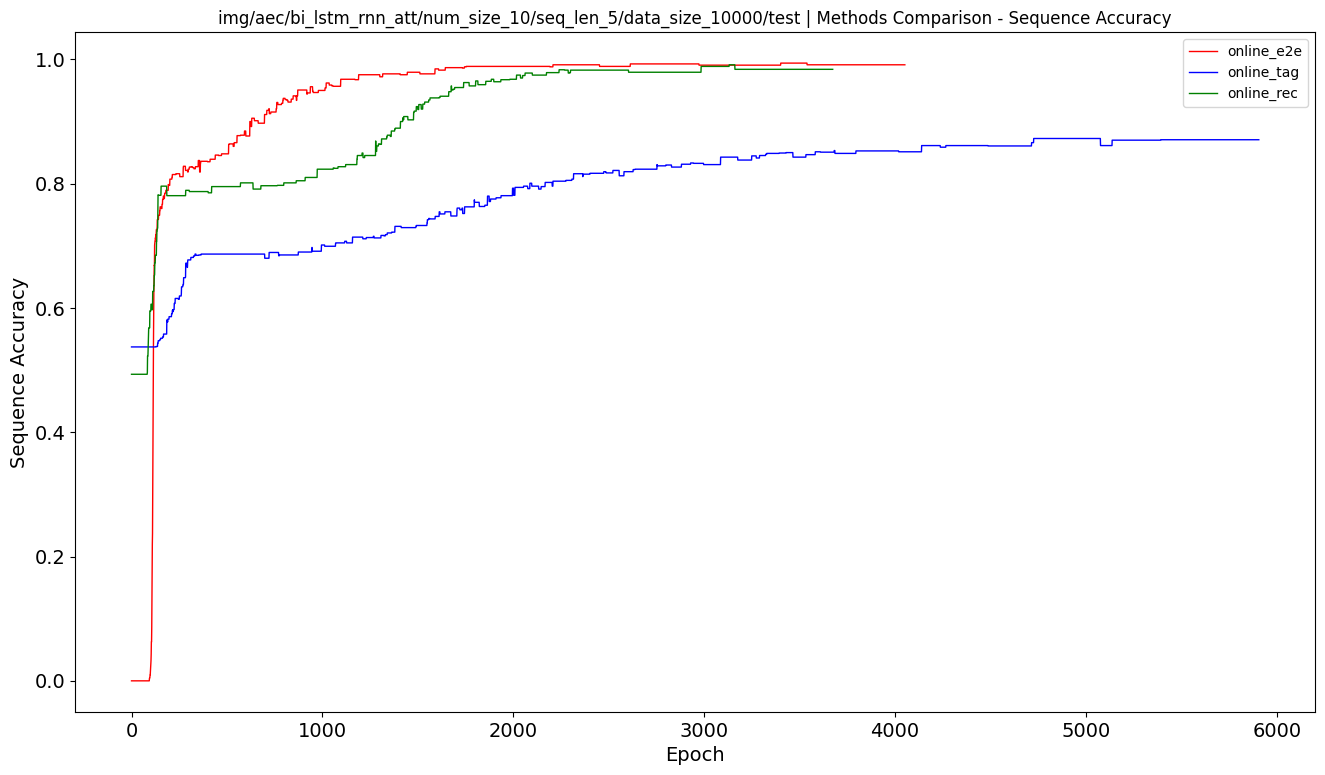

In [469]:
colors = ['red', 'blue', 'green', 'skyblue', 'orange', 'magenta', 'purple']
save_path = os.path.join(
    'img', 
    data_src, 
    model_name, 
    'num_size_{}'.format(num_size), 
    'seq_len_{}'.format(seq_len), 
    'data_size_{}'.format(data_size), 
    val_or_test)

if not os.path.exists(save_path): os.makedirs(save_path)

title = 'Methods Comparison - {}'.format(criteria)

show_plot(
    data_dict=criteria_dict, 
    colors=colors, 
    title=title, 
    xlabel='Epoch', 
    ylabel=criteria, 
    save_path=save_path)

## Methods vs. Number Size

In [442]:
# parameters
candidates = [
    ['offline', 'e2e'], 
    ['online', 'e2e'], 
    ['offline', 'tag'],
    ['online', 'tag'], 
    ['offline', 'rec'], 
    ['online', 'rec']
]
# aes, aor, aec
data_src = 'aes'
model_name = 'bi_lstm_rnn_att' 
seq_len = 5 
data_size = 10000
min_num_size = 100
max_num_size = 300
interval_num_size = 50
val_or_test = 'test' # val, test

In [443]:
# define path for end2end
LOG_PATH = os.path.join(
    'log', 
    data_src, 
    '{}', # data mode
    model_name,
    '{}', # method
    'num_size_{}', # number size
    'seq_len_{}'.format(seq_len),
    'data_size_{}'.format(data_size), # data size
    '{}.txt'.format(val_or_test))

In [444]:
# read data
raw_data_dict = {}
for c in candidates: 
    for i in range(min_num_size, max_num_size+1, interval_num_size): 
        file_name = LOG_PATH.format(c[0], c[1], i)
        print(file_name)
        raw_data_dict[file_name] = load_txt(file_name)

log/aes/offline/bi_lstm_rnn_att/e2e/num_size_100/seq_len_5/data_size_10000/test.txt
log/aes/offline/bi_lstm_rnn_att/e2e/num_size_150/seq_len_5/data_size_10000/test.txt
log/aes/offline/bi_lstm_rnn_att/e2e/num_size_200/seq_len_5/data_size_10000/test.txt
log/aes/offline/bi_lstm_rnn_att/e2e/num_size_250/seq_len_5/data_size_10000/test.txt
log/aes/offline/bi_lstm_rnn_att/e2e/num_size_300/seq_len_5/data_size_10000/test.txt
log/aes/online/bi_lstm_rnn_att/e2e/num_size_100/seq_len_5/data_size_10000/test.txt
log/aes/online/bi_lstm_rnn_att/e2e/num_size_150/seq_len_5/data_size_10000/test.txt
log/aes/online/bi_lstm_rnn_att/e2e/num_size_200/seq_len_5/data_size_10000/test.txt
log/aes/online/bi_lstm_rnn_att/e2e/num_size_250/seq_len_5/data_size_10000/test.txt
log/aes/online/bi_lstm_rnn_att/e2e/num_size_300/seq_len_5/data_size_10000/test.txt
log/aes/offline/bi_lstm_rnn_att/tag/num_size_100/seq_len_5/data_size_10000/test.txt
log/aes/offline/bi_lstm_rnn_att/tag/num_size_150/seq_len_5/data_size_10000/test.t

In [445]:
# extract info from log
data_dict = {k: parse_log(v) for k, v in raw_data_dict.items()}

In [450]:
# 'Epoch', 'Step', 'Loss', 'Equation Accuracy', 'Token Accuracy', 'Sequence Accuracy'
criteria = 'Sequence Accuracy'
criteria_dict = {}
for c in candidates:
    label = '_'.join(c)
    criteria_list = []
    for i in range(min_num_size, max_num_size+1, interval_num_size): 
        key = LOG_PATH.format(c[0], c[1], i)
        criteria_list.append(data_dict[key][-1][criteria])
    criteria_dict[label] = criteria_list

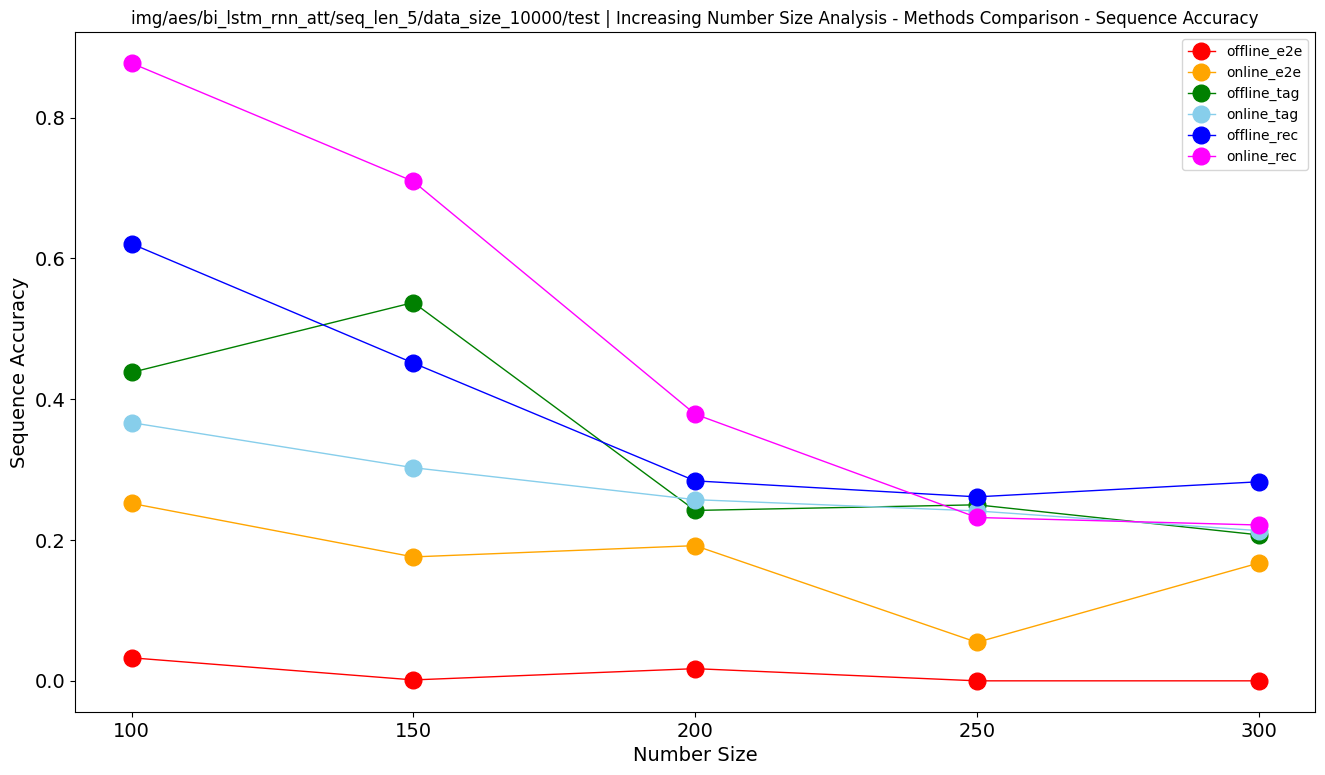

In [451]:
colors = ['red', 'orange', 'green', 'skyblue', 'blue', 'magenta', 'purple']
save_path = os.path.join(
    'img', 
    data_src, 
    model_name, 
    'seq_len_{}'.format(seq_len), 
    'data_size_{}'.format(data_size), 
    val_or_test)

if not os.path.exists(save_path): os.makedirs(save_path)

title = 'Increasing Number Size Analysis - Methods Comparison - {}'.format(criteria)

show_plot(
    data_dict=criteria_dict, 
    colors=colors, 
    title=title, 
    xlabel='Number Size', 
    ylabel=criteria, 
    save_path=save_path, 
    xticks=range(min_num_size, max_num_size+1, interval_num_size), 
    marker=True
)

## Methods vs. Sequence Length

In [9]:
# parameters
candidates = [
    ['offline', 'e2e'], 
    ['online', 'e2e'], 
    ['offline', 'tag'],
    ['online', 'tag'], 
    ['offline', 'rec'], 
    ['online', 'rec']
]
# aes, aor, aec
data_src = 'aor'
model_name = 'bi_lstm_rnn_att'
num_size = 10
data_size = 50000
min_seq_len = 5
max_seq_len = 10 
interval_seq_len = 1
val_or_test = 'test' # val, test

In [10]:
# define path for end2end
LOG_PATH = os.path.join(
    'log', 
    data_src, 
    '{}', # data mode
    model_name,
    '{}', # method
    'num_size_{}'.format(num_size), # number size
    'seq_len_{}', # sequence length
    'data_size_{}'.format(data_size), # data size
    '{}.txt'.format(val_or_test))

In [11]:
# read data
raw_data_dict = {}
for c in candidates: 
    for i in range(min_seq_len, max_seq_len+1, interval_seq_len): 
        file_name = LOG_PATH.format(c[0], c[1], i)
        print(file_name)
        raw_data_dict[file_name] = load_txt(file_name)

log/aor/offline/bi_lstm_rnn_att/e2e/num_size_10/seq_len_5/data_size_50000/test.txt
log/aor/offline/bi_lstm_rnn_att/e2e/num_size_10/seq_len_6/data_size_50000/test.txt
log/aor/offline/bi_lstm_rnn_att/e2e/num_size_10/seq_len_7/data_size_50000/test.txt
log/aor/offline/bi_lstm_rnn_att/e2e/num_size_10/seq_len_8/data_size_50000/test.txt
log/aor/offline/bi_lstm_rnn_att/e2e/num_size_10/seq_len_9/data_size_50000/test.txt
log/aor/offline/bi_lstm_rnn_att/e2e/num_size_10/seq_len_10/data_size_50000/test.txt
log/aor/online/bi_lstm_rnn_att/e2e/num_size_10/seq_len_5/data_size_50000/test.txt
log/aor/online/bi_lstm_rnn_att/e2e/num_size_10/seq_len_6/data_size_50000/test.txt
log/aor/online/bi_lstm_rnn_att/e2e/num_size_10/seq_len_7/data_size_50000/test.txt
log/aor/online/bi_lstm_rnn_att/e2e/num_size_10/seq_len_8/data_size_50000/test.txt
log/aor/online/bi_lstm_rnn_att/e2e/num_size_10/seq_len_9/data_size_50000/test.txt
log/aor/online/bi_lstm_rnn_att/e2e/num_size_10/seq_len_10/data_size_50000/test.txt
log/aor/

In [12]:
# extract info from log
data_dict = {k: parse_log(v) for k, v in raw_data_dict.items()}

In [13]:
# 'Epoch', 'Step', 'Loss', 'Equation Accuracy', 'Token Accuracy', 'Sequence Accuracy'
criteria = 'Equation Accuracy'
criteria_dict = {}
for c in candidates:
    label = '_'.join(c)
    criteria_list = []
    for i in range(min_seq_len, max_seq_len+1, interval_seq_len): 
        key = LOG_PATH.format(c[0], c[1], i)
        criteria_list.append(data_dict[key][-1][criteria])
    criteria_dict[label] = criteria_list

In [14]:
print(criteria_dict)

{'offline_e2e': [0.7115, 0.1777, 0.072, 0.0629, 0.0519, 0.0415], 'online_e2e': [0.7443, 0.2089, 0.0876, 0.0732, 0.0581, 0.0444], 'offline_tag': [0.8039, 0.2532, 0.0751, 0.0579, 0.0453, 0.0493], 'online_tag': [0.8156, 0.3283, 0.1661, 0.0667, 0.0499, 0.0493], 'offline_rec': [0.5483, 0.3036, 0.1812, 0.1436, 0.0956, 0.09], 'online_rec': [0.836, 0.5269, 0.3503, 0.2875, 0.2023, 0.1993]}


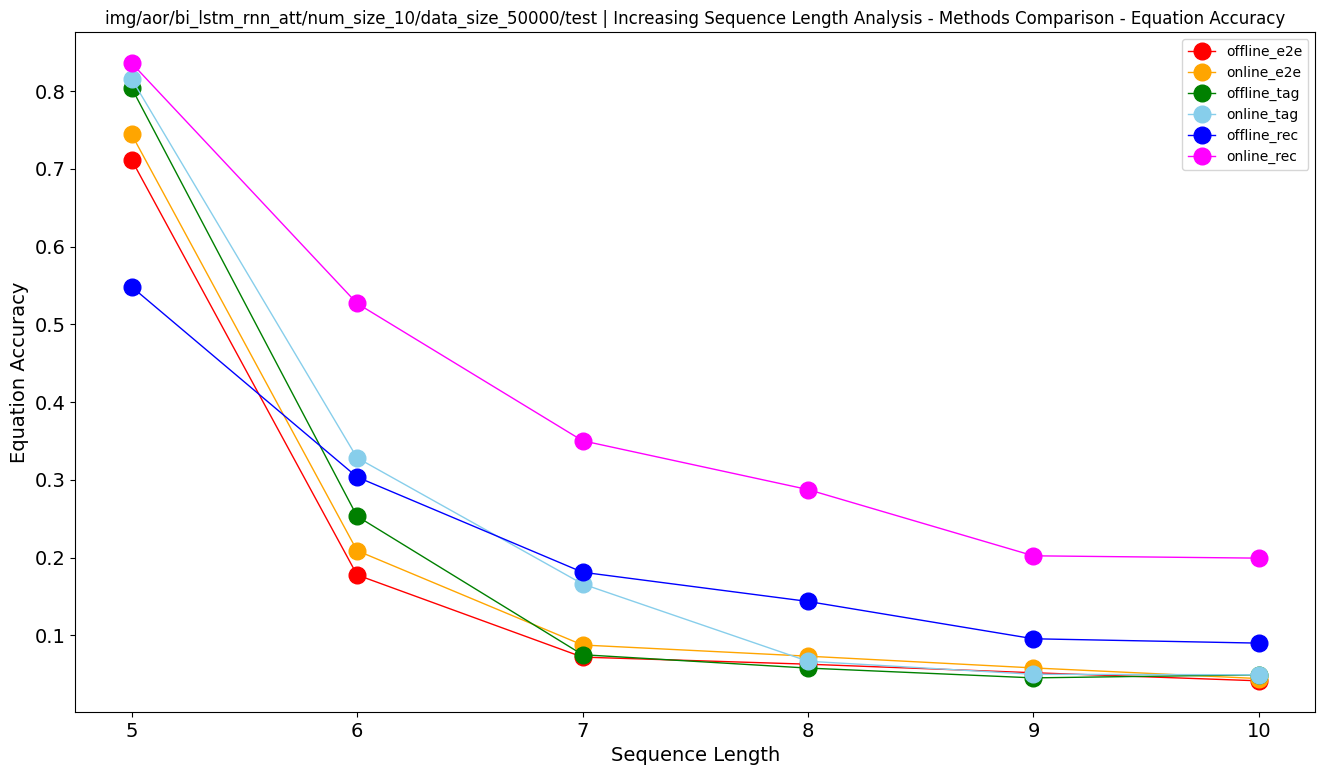

In [15]:
colors = ['red', 'orange', 'green', 'skyblue', 'blue', 'magenta', 'purple']
save_path = os.path.join(
    'img',
    '{}'.format(data_src), 
    model_name, 
    'num_size_{}'.format(num_size), 
    'data_size_{}'.format(data_size), 
    val_or_test)

if not os.path.exists(save_path): os.makedirs(save_path)

title = 'Increasing Sequence Length Analysis - Methods Comparison - {}'.format(criteria)

show_plot(
    data_dict=criteria_dict, 
    colors=colors, 
    title=title, 
    xlabel='Sequence Length', 
    ylabel=criteria, 
    save_path=save_path, 
    xticks=range(min_seq_len, max_seq_len+1, interval_seq_len), 
    marker=True
)

## Methods vs. Data Size

In [439]:
# parameters
candidates = [
    ['offline', 'e2e'], 
    ['online', 'e2e'], 
    ['offline', 'tag'],
    ['online', 'tag'], 
    ['offline', 'rec'], 
    ['online', 'rec']
]
# aes, aor, aec
data_src = 'aes'
# transformer, bi_lstm_rnn_att
model_name = 'bi_lstm_rnn_att'
num_size = 100
seq_len = 5
min_data_size = 10000
max_data_size = 20000
interval_data_size = 10000
val_or_test = 'test' # val, test

In [440]:
# define path for end2end
LOG_PATH = os.path.join(
    'log', 
    data_src, 
    '{}', # data mode
    model_name, # model name
    '{}', # method
    'num_size_{}'.format(num_size), 
    'seq_len_{}'.format(seq_len), 
    'data_size_{}', # data size 
    '{}.txt'.format(val_or_test))

In [441]:
# read data
raw_data_dict = {}
for c in candidates: 
    for i in range(min_data_size, max_data_size+1, interval_data_size): 
        file_name = LOG_PATH.format(c[0], c[1], i)
        print(file_name)
        raw_data_dict[file_name] = load_txt(file_name)

log/aes/offline/bi_lstm_rnn_att/e2e/num_size_100/seq_len_5/data_size_10000/test.txt
log/aes/offline/bi_lstm_rnn_att/e2e/num_size_100/seq_len_5/data_size_20000/test.txt
log/aes/online/bi_lstm_rnn_att/e2e/num_size_100/seq_len_5/data_size_10000/test.txt
log/aes/online/bi_lstm_rnn_att/e2e/num_size_100/seq_len_5/data_size_20000/test.txt
log/aes/offline/bi_lstm_rnn_att/tag/num_size_100/seq_len_5/data_size_10000/test.txt
log/aes/offline/bi_lstm_rnn_att/tag/num_size_100/seq_len_5/data_size_20000/test.txt
log/aes/online/bi_lstm_rnn_att/tag/num_size_100/seq_len_5/data_size_10000/test.txt
log/aes/online/bi_lstm_rnn_att/tag/num_size_100/seq_len_5/data_size_20000/test.txt
log/aes/offline/bi_lstm_rnn_att/rec/num_size_100/seq_len_5/data_size_10000/test.txt
log/aes/offline/bi_lstm_rnn_att/rec/num_size_100/seq_len_5/data_size_20000/test.txt
log/aes/online/bi_lstm_rnn_att/rec/num_size_100/seq_len_5/data_size_10000/test.txt
log/aes/online/bi_lstm_rnn_att/rec/num_size_100/seq_len_5/data_size_20000/test.tx

In [442]:
# extract info from log
data_dict = {k: parse_log(v) for k, v in raw_data_dict.items()}

In [443]:
# 'Epoch', 'Step', 'Loss', 'Token Accuracy', 'Sequence Accuracy', 'Equation Accuracy'
criteria = 'Sequence Accuracy'
criteria_dict = {}
for c in candidates:
    label = '_'.join(c)
    criteria_list = []
    for i in range(min_data_size, max_data_size+1, interval_data_size):
        key = LOG_PATH.format(c[0], c[1], i)
#         print(key)
        criteria_list.append(data_dict[key][-1][criteria])
    criteria_dict[label] = criteria_list

In [444]:
print(criteria_dict)

{'offline_e2e': [0.0327, 0.392], 'online_e2e': [0.252, 0.3787], 'offline_tag': [0.708, 0.9007], 'online_tag': [0.578, 0.87], 'offline_rec': [0.772, 0.8973], 'online_rec': [0.75, 0.9873]}


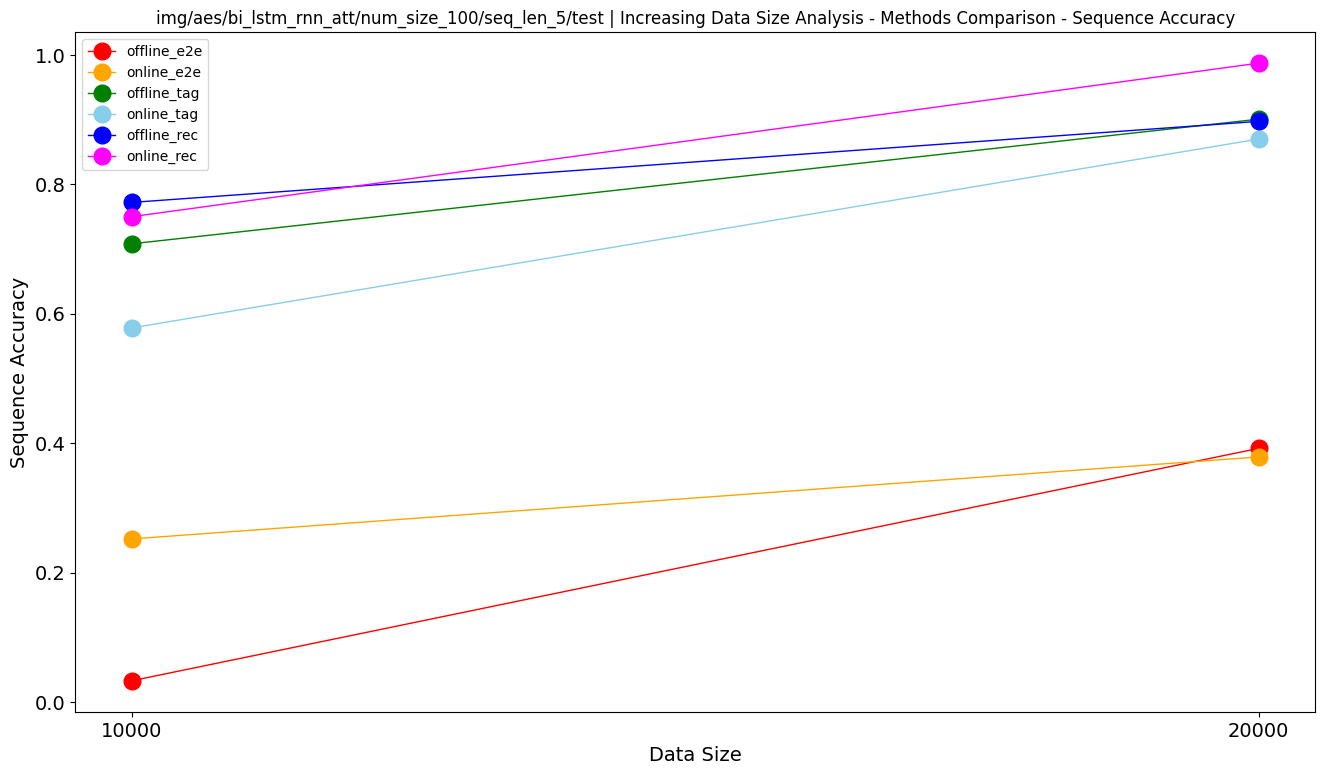

In [445]:
colors = ['red', 'orange', 'green', 'skyblue', 'blue', 'magenta', 'purple']
save_path = os.path.join(
    'img',
    '{}'.format(data_src), 
    model_name, 
    'num_size_{}'.format(num_size), 
    'seq_len_{}'.format(seq_len), 
    val_or_test)

if not os.path.exists(save_path): os.makedirs(save_path)

title = 'Increasing Data Size Analysis - Methods Comparison - {}'.format(criteria)

show_plot(
    data_dict=criteria_dict, 
    colors=colors, 
    title=title, 
    xlabel='Data Size', 
    ylabel=criteria, 
    save_path=save_path, 
    xticks=range(min_data_size, max_data_size+1, interval_data_size), 
    marker=True
)

In [414]:
import numpy as np 

y = ['<done>']*3
ys = [y for i in range(9)]
ys.append(['<delete>', '<pos_1>', '<done>'])
print(ys)

[['<done>', '<done>', '<done>'], ['<done>', '<done>', '<done>'], ['<done>', '<done>', '<done>'], ['<done>', '<done>', '<done>'], ['<done>', '<done>', '<done>'], ['<done>', '<done>', '<done>'], ['<done>', '<done>', '<done>'], ['<done>', '<done>', '<done>'], ['<done>', '<done>', '<done>'], ['<delete>', '<pos_1>', '<done>']]


In [415]:
mask = ~(np.array(ys) == '<done>').all(axis=-1)
mask

array([False, False, False, False, False, False, False, False, False,
        True])

In [416]:
if not mask.any():
    print('done')
else:
    print('not done')

not done


In [417]:
np.arange(10)[mask]

array([9])